In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [128]:
dados = pd.read_csv(r'C:\Projetos Data Science\Detecção de Fraude no Cartão de Crédito\Dados\creditcard.csv')

In [129]:
# <-- ANÁLISE EXPLOCRATÓRIA DOS DADOS
# -> nº de Operações Fraudulentas e Normais
n_normais = len(dados[dados.Class == 0])
n_fraudes = len(dados[dados.Class == 1])
print('Nº de Operações Normais:', n_normais)
print('Nº de Operações Fraudulentas:', n_fraudes)

Nº de Operações Normais: 284315
Nº de Operações Fraudulentas: 492


In [130]:
# <-- REAMOSTRAGEM DOS DADOS
# -> Estratificação da Amostra
operacoes_normais = np.array(np.random.choice(dados[dados.Class == 0].index, n_fraudes, replace=False))
operacoes_fraudulentas = np.array(dados[dados.Class == 1].index)
amostra_indice = np.concatenate([operacoes_normais, operacoes_fraudulentas])
amostra = dados.iloc[amostra_indice, :]

In [131]:
# <-- SEPARAÇÂO DOS DADOS (AMOSTRA)
previsores_amostra = amostra.loc[:, amostra.columns != 'Class'].values
classe_amostra = amostra.loc[:, amostra.columns == 'Class'].values

In [132]:
# <-- DIVIDINDO OS DADOS EM TREINO E TESTE (AMOSTRA)(70%/30%)
X_treinamento_amostra, X_teste_amostra, y_treinamento_amostra, y_teste_amostra = train_test_split(previsores_amostra,
                                                                                                    classe_amostra,
                                                                                                    test_size=0.30,
                                                                                                    random_state=0)
X_teste_amostra   

array([[ 1.61464000e+05,  2.26760118e+00, -1.63475386e+00, ...,
         2.67723554e-02, -5.59900185e-02,  2.50000000e+01],
       [ 1.20930000e+04, -4.69679522e+00,  2.69386748e+00, ...,
        -1.50845793e+00,  6.08074683e-01,  0.00000000e+00],
       [ 3.82860000e+04, -1.59725182e+00,  7.38875424e-01, ...,
        -8.53200640e-01, -2.61328610e-01,  1.20000000e+01],
       ...,
       [ 1.49096000e+05,  1.18489112e+00,  3.15208421e+00, ...,
         4.85186935e-01,  3.26551572e-01,  0.00000000e+00],
       [ 1.46022000e+05,  9.08636658e-01,  2.84902401e+00, ...,
         6.48704799e-01,  3.60224330e-01,  1.18000000e+00],
       [ 7.51900000e+03,  1.23423505e+00,  3.01974042e+00, ...,
        -1.00162235e-02,  1.46792735e-01,  1.00000000e+00]])

In [133]:
# <-- CRIAÇÃO E TREINAMENTO DO MODELO
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento_amostra, y_treinamento_amostra)

c:\Projetos Data Science\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [134]:
# <-- PREVISÕES ATRAVÉS DOS DADOS TESTES
previsao = naive_bayes.predict(X_teste_amostra)
previsao

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [135]:
# <-- TAXA DE ACERTO DO MODELO
taxa_acerto = accuracy_score(y_teste_amostra, previsao)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.8277027027027027

c:\Projetos Data Science\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


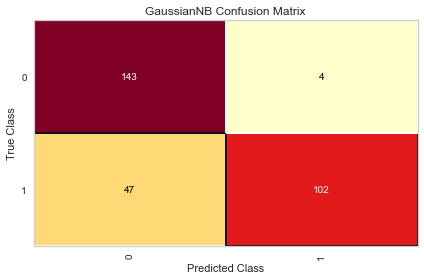

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [136]:
# VISUALIZAÇÃO DA MATRIX DE CONFUSÃO
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento_amostra, y_treinamento_amostra)
v.score(X_teste_amostra, y_teste_amostra)
v.poof()